<a href="https://www.kaggle.com/code/mrankitgupta/spotify-data-analysis-using-python-project?scriptVersionId=93571216" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [124]:
## Project on Spotify Data Analysis using Python - Rahul Rajan

In [126]:
## INTRODUCTION

Spotify is a Swedish audio streaming and media services provider founded in April 2006. It is the world's largest music streaming service provider and has over 381 million monthly active users, which also includes 172 million paid subscribers.

Here, We'll exploring and quantify data about music and drawing valuable insights.

Perform an exploratory data analysis (EDA) and data visualization project using data from Spotify using Python.

Data analysis exploring the relationship between the audio features of a song and how positive or negative its lyrics are, involving sentiment analysis.

Includes data collection script that scrapes audio feature data from the Spotify API, as well as lyrical data from the LyricWikiAPI

Spotify Data Analysis makes use of secondary data from Spotify. Learners will use data to identify patterns and relationships between different characteristics. The activity will support learners in developing their ability to review and interpret a dataset. The activity starts by encouraging learners to think of questions that the dataset might answer and thus develop their “Problem” skills. Once the dataset has been analysed learners will have the opportunity to reorganise and restructure data to help them answer their questions.

SyntaxError: unterminated string literal (detected at line 3) (90439345.py, line 3)

## Importing Datasets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Reading Data Set 
df_tracks = pd.read_csv('F:/Courses_Files/Data_Analyst_Files_&_Resources/python_DA_Projects/spotify_datasets/tracks.csv')
df_spotfeatures = pd.read_csv('F:/Courses_Files/Data_Analyst_Files_&_Resources/python_DA_Projects/spotify_datasets/SpotifyFeatures.csv')
df_artists = pd.read_csv('F:/Courses_Files/Data_Analyst_Files_&_Resources/python_DA_Projects/spotify_datasets/artists.csv')

C:\Users\RAHUL RAJAN\AppData\Local\Temp\ipykernel_13912\679037229.py:2: DtypeWarning: Columns (1,2,3,4,7,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracks = pd.read_csv('F:/Courses_Files/Data_Analyst_Files_&_Resources/python_DA_Projects/spotify_datasets/tracks.csv')


In [27]:
# info about all the files
df_tracks.info()
df_spotfeatures.info()
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Column1           114000 non-null   float64
 1   track_id          114000 non-null   object 
 2   artists           113999 non-null   object 
 3   album_name        113999 non-null   object 
 4   track_name        113999 non-null   object 
 5   popularity        114000 non-null   float64
 6   duration_ms       114000 non-null   float64
 7   explicit          114000 non-null   object 
 8   danceability      114000 non-null   float64
 9   energy            114000 non-null   float64
 10  key               114000 non-null   float64
 11  loudness          114000 non-null   float64
 12  mode              114000 non-null   float64
 13  speechiness       114000 non-null   float64
 14  acousticness      114000 non-null   float64
 15  instrumentalness  114000 non-null   float64
 16  

In [28]:
df_tracks.head()

,Column1,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year,release_date
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,1999,02-11-1999
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,1999,02-11-1999
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1999,02-11-1999
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1999,02-11-1999
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1999,02-11-1999


In [29]:
df_spotfeatures.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


## Spotify Tracks Dataset Analysis

In [30]:
# checking null values
pd.isnull(df_tracks).sum()

Column1             934575
track_id            934575
artists             934576
album_name          934576
track_name          934576
popularity          934575
duration_ms         934575
explicit            934575
danceability        934575
energy              934575
key                 934575
loudness            934575
mode                934575
speechiness         934575
acousticness        934575
instrumentalness    934575
liveness            934575
valence             934575
tempo               934575
time_signature      934575
track_genre         934575
year                     0
release_date             0
dtype: int64

### Descriptive statistics of Spotify tracks

In [32]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Column1,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


### Top 5 most popular songs on Spotify

In [103]:
df_most = df_tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
df_most[:5]

,Column1,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,,
27-05-1905,20001.0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100.0,False,0.714,0.472,2.0,...,0.01300,0.000005,0.266,0.238,131.121,4.0,dance,1974,156,27-05-1905
18-06-1905,81051.0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100.0,False,0.714,0.472,2.0,...,0.01300,0.000005,0.266,0.238,131.121,4.0,pop,1996,156,18-06-1905
25-06-1905,51664.0,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99.0,False,0.621,0.782,2.0,...,0.01250,0.033000,0.230,0.550,128.033,4.0,hip-hop,2003,198,25-06-1905
28-08-2012,81210.0,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98.0,True,0.561,0.965,7.0,...,0.00383,0.000007,0.371,0.304,128.040,4.0,pop,2012,175,28-08-2012
01-01-2006,89411.0,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98.0,False,0.835,0.679,7.0,...,0.58300,0.000002,0.218,0.850,124.980,4.0,reggaeton,2006,162,01-01-2006


### Top 5 least popular songs on Spotify

In [105]:
df_least = df_tracks.query('popularity < 30', inplace = False).sort_values('popularity', ascending = False)
df_least[:5]

,Column1,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,,
01-01-2006,105411.0,3woe4qDqwttRfw1fSd5ZBk,Smartface;Toby Tranter,Push It,Mad Zach,29.0,False,0.654,0.509,5.0,...,0.54900,0.861000,0.1120,0.508,146.983,4.0,study,2006,146,01-01-2006
15-06-1905,113416.0,54swLoNkqkw4yMjkMVQtRN,Hillsong Worship;Delirious?,[UP] UNIFIED:PRAISE (Live),Majesty (Here I Am),29.0,False,0.501,0.641,1.0,...,0.00111,0.000001,0.0686,0.281,142.062,4.0,world-music,1993,366,15-06-1905
01-01-2003,90926.0,0S80vrUvbnoOlPVFAjesGc,Alberto Vazquez,Cosas de Alberto Vázquez,Creo Estar Soñando,29.0,False,0.495,0.275,4.0,...,0.60100,0.000000,0.1120,0.517,180.666,4.0,rock-n-roll,2003,163,01-01-2003
22-06-1905,113448.0,0lSwLhBarLwM5XTFmBc8ri,Planetshakers,Nada Es Imposible,Todo mundo de Pie,29.0,False,0.620,0.900,7.0,...,0.00332,0.000000,0.0118,0.706,129.999,4.0,world-music,2000,239,22-06-1905
01-01-2003,90931.0,3QslWf6jjw6f0by37Zrupd,Frankie Avalon,Venus,Bobby Sox to Stockings,29.0,False,0.608,0.405,7.0,...,0.78100,0.000000,0.2630,0.617,117.758,4.0,rock-n-roll,2003,159,01-01-2003


### Changing index to release date

### Searching specific artist by row of Spotify Tracks Dataset

In [ ]:
df_tracks.set_index('release_date',inplace=True)
df_tracks.index= pd.to_datetime(df_tracks.index)
df_tracks.head()

In [44]:
df_tracks[['artists']].iloc[11]

artists    Jason Mraz
Name: 02-11-1999, dtype: object

In [47]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 02-11-1999 to 20-01-2014
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Column1           114000 non-null   float64
 1   track_id          114000 non-null   object 
 2   artists           113999 non-null   object 
 3   album_name        113999 non-null   object 
 4   track_name        113999 non-null   object 
 5   popularity        114000 non-null   float64
 6   duration_ms       114000 non-null   float64
 7   explicit          114000 non-null   object 
 8   danceability      114000 non-null   float64
 9   energy            114000 non-null   float64
 10  key               114000 non-null   float64
 11  loudness          114000 non-null   float64
 12  mode              114000 non-null   float64
 13  speechiness       114000 non-null   float64
 14  acousticness      114000 non-null   float64
 15  instrumentalness  114000 non-null   float6

### Converting duration from milli-seconds to seconds of Spotify Tracks Dataset

In [81]:
df_tracks['duration'] = df_tracks['duration'].astype(int)
df_tracks.duration.head()

release_date
02-11-1999    230
02-11-1999    149
02-11-1999    210
02-11-1999    201
02-11-1999    198
Name: duration, dtype: int32

### Correlation Heatmap between Variable using Pearson correlation method

C:\Users\RAHUL RAJAN\AppData\Local\Temp\ipykernel_13912\2007587498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_tracks.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')


[Text(0.5, 0, 'Column1'),
 Text(1.5, 0, 'popularity'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'year'),
 Text(13.5, 0, 'duration')]

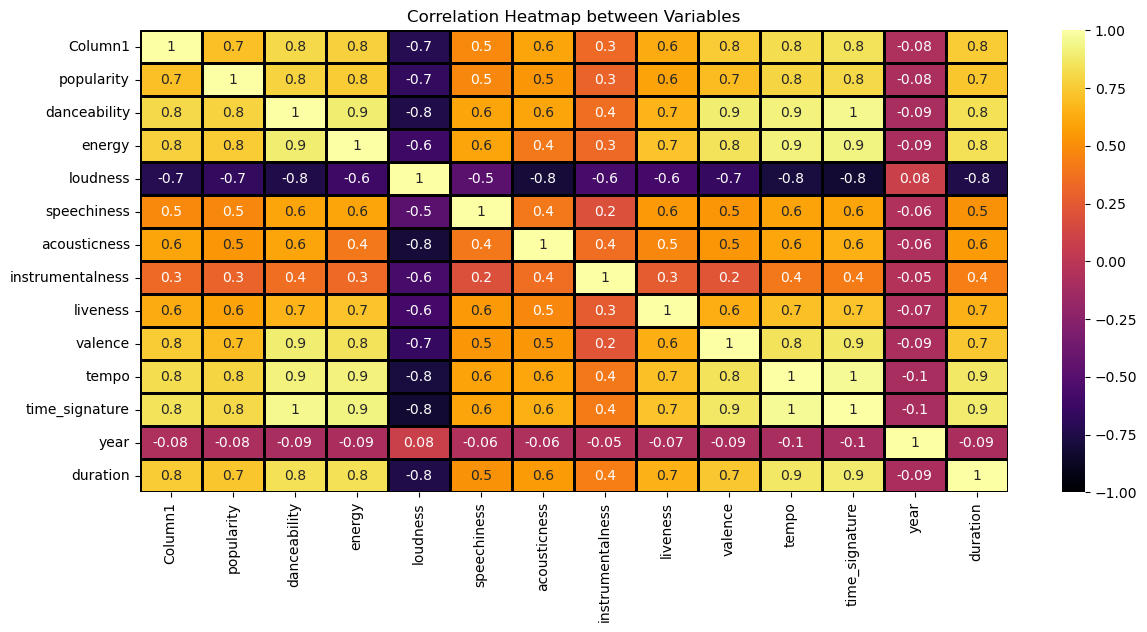

In [86]:
corr_df = df_tracks.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(corr_df, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variables')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

In [ ]:
### Checking for total number of 

In [95]:
print(len(df_tracks))

1048575


### Considering 0.004% of the total dataset to create Regression plots

In [92]:
df_sample = df_tracks.sample(int(0.004 * len(df_tracks)))
len(df_sample)

4194

### Regression plot - Correlation between Loudness vs Energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

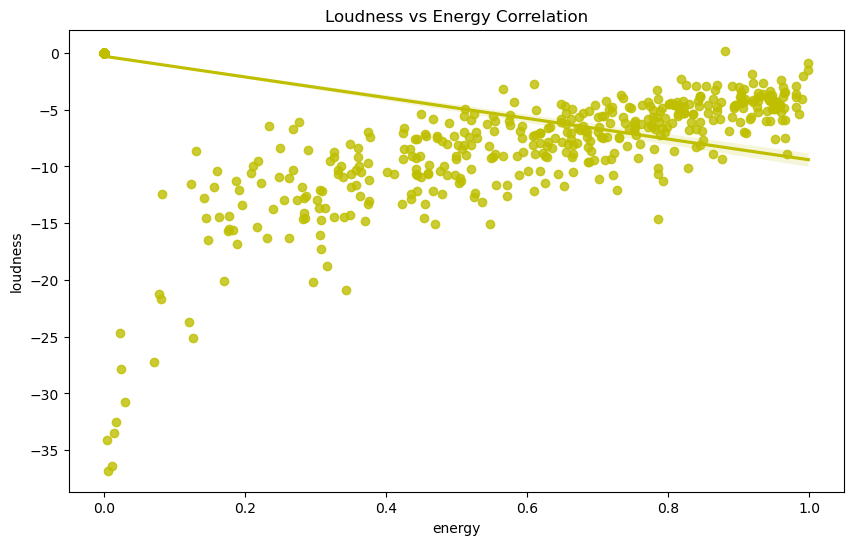

In [97]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_sample, y='loudness', x='energy', color='y').set(title='Loudness vs Energy Correlation')

### Regression plot - Correlation between Popularity vs Acousticness

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

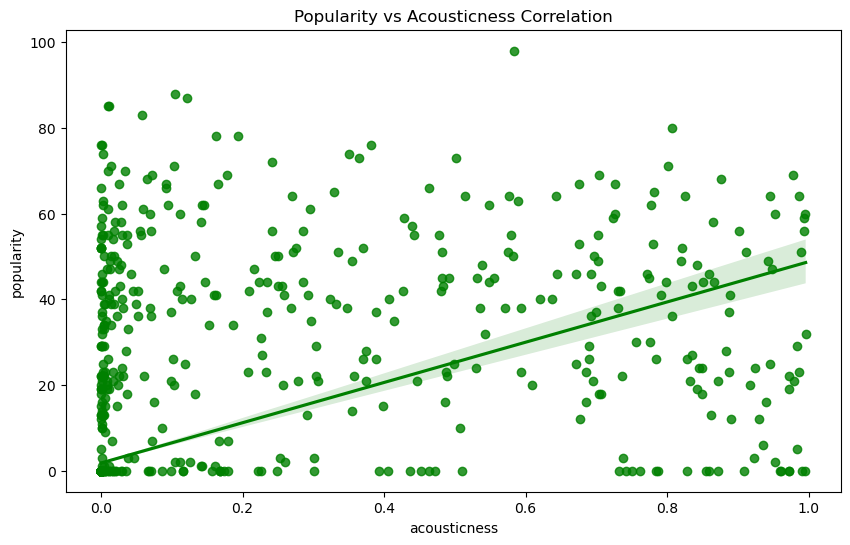

In [99]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_sample, y='popularity', x='acousticness', color='g').set(title='Popularity vs Acousticness Correlation')

In [114]:
df_tracks.head()

,Column1,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,year,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,,
02-11-1999,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,False,0.676,0.4610,1.0,...,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,1999,230,02-11-1999
02-11-1999,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,False,0.420,0.1660,1.0,...,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,1999,149,02-11-1999
02-11-1999,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,False,0.438,0.3590,0.0,...,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1999,210,02-11-1999
02-11-1999,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,False,0.266,0.0596,0.0,...,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1999,201,02-11-1999
02-11-1999,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,False,0.618,0.4430,2.0,...,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1999,198,02-11-1999


### Creating new column in tracks dataset (Year, Release Date)

In [ ]:
df_tracks['dates']=df_tracks.index.get_level_values('dates')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

### Distibution plot - Visualize total number of songs on Spotify since 1992

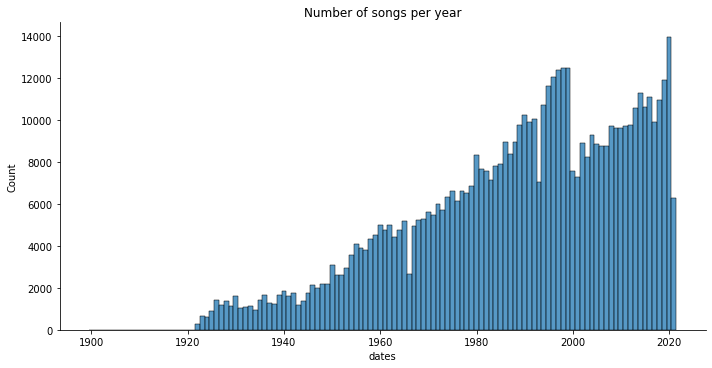

In [20]:
sns.displot(years, discrete=True, aspect=2, height=5, kind='hist').set(title='Number of songs per year')

In [117]:
df_spotfeatures.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


## Spotify Features Dataset Analysis

### Duration of songs in different Genres

Text(0, 0.5, 'Genres')

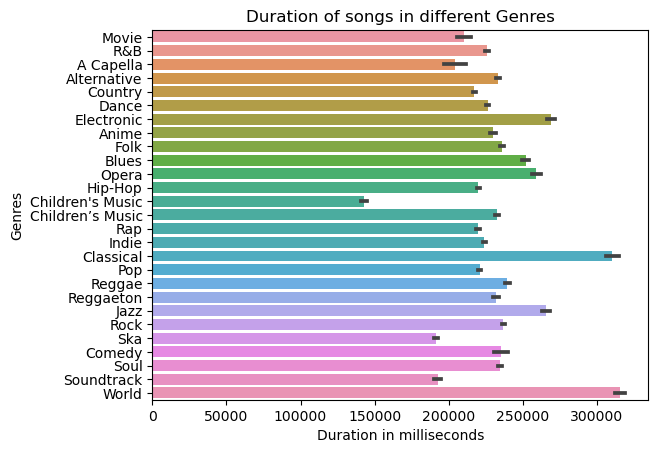

In [115]:
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=df_spotfeatures)
plt.xlabel('Duration in milliseconds')
plt.ylabel('Genres')

### Top 5 Genres by Popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

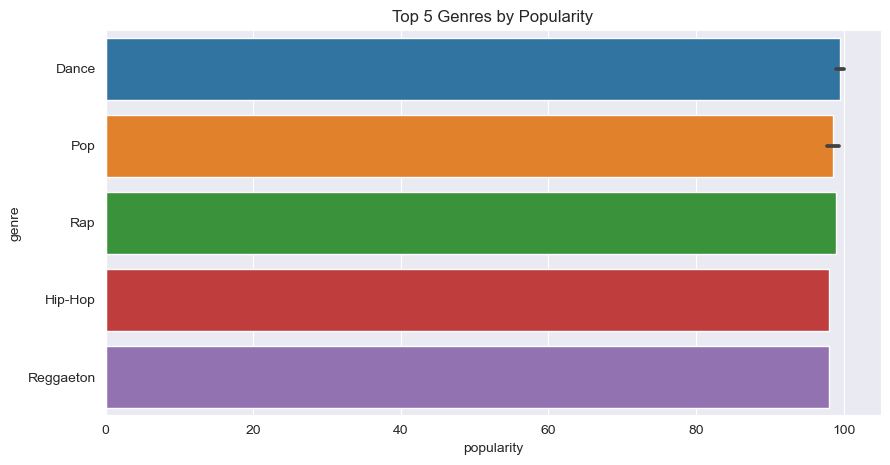

In [118]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df_spotfeatures.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity', data = popular).set(title='Top 5 Genres by Popularity')